12.1 The tasks:

For this chapter, you will have to do the following:

• Bring all columns into a numeric form: applying mapping or dummy
variables.

• If you think it can be helpful, you may apply feature scaling.

• Using Silhouette score, find the best number of clusters for GMM
(implemented in sklearn.)

• Using Silhouette score, find the best number of clusters for KMeans
(implemented in sklearn.)

• Plot the process of choosing the best number of clusters for each
algorithm and try to explain.

• Cluster the Data Set using both algorithms.

• Extract from the KMeans algorithm the centroids.

• Extract from GMM the means of the clusters.

• Build the following table for both algorithms, and fill the table with
the means of the clusters.
feature 1 feature 2 ... feature m
cluster 1
cluster 2
...
cluster n

• Make a conclusion based on the table you got and create an imaginary customer for every cluster.


In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import kagglehub
from pathlib import Path

In [24]:
# Download latest version
path = kagglehub.dataset_download("sadeghjalalian/wine-customer-segmentation")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/wine-customer-segmentation


In [25]:
csv_files = list(Path(path).rglob("*.csv"))
df = pd.read_csv(csv_files[0])

In [26]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [27]:
cat_cols = ['Alcohol',	'Malic_Acid',	'Ash',	'Ash_Alcanity',	'Magnesium',	'Total_Phenols',	'Flavanoids',	'Nonflavanoid_Phenols',	'Proanthocyanins',	'Color_Intensity',	'Hue', 	'OD280',	'Proline',	'Customer_Segment']  # дополните список
encoder = OneHotEncoder(sparse_output=False, drop='first')
ohe = encoder.fit_transform(df[cat_cols])
ohe_cols = encoder.get_feature_names_out(cat_cols)
df_ohe = pd.DataFrame(ohe, columns=ohe_cols, index=df.index)

# Объединяем обратно и удаляем исходные
df = pd.concat([df.drop(columns=cat_cols), df_ohe], axis=1)

If you think it can be helpful, you may apply feature scaling.

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(df.select_dtypes(include='number'))


3–4 • Using Silhouette score, find the best number of clusters for GMM
(implemented in sklearn.)

• Using Silhouette score, find the best number of clusters for KMeans
(implemented in sklearn.)


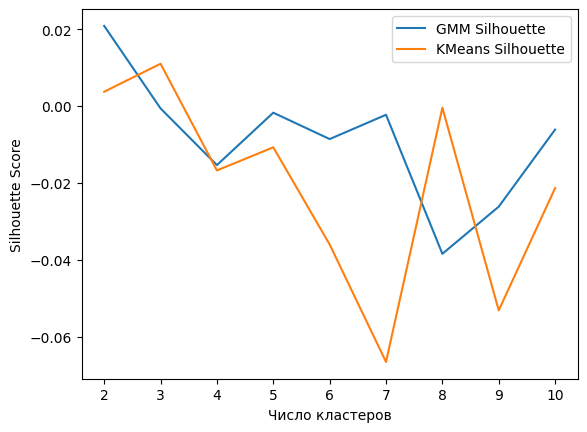

In [29]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

def evaluate_range(X, algo, cluster_range):
    scores = []
    for k in cluster_range:
        model = algo(n_components=k) if algo is GaussianMixture else algo(n_clusters=k)
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores

cluster_range = range(2, 11)

# GMM
gmm_scores = evaluate_range(X, GaussianMixture, cluster_range)

# KMeans
kmeans_scores = evaluate_range(X, KMeans, cluster_range)

# Визуализация
plt.plot(cluster_range, gmm_scores, label='GMM Silhouette')
plt.plot(cluster_range, kmeans_scores, label='KMeans Silhouette')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


5–6 • Plot the process of choosing the best number of clusters for each
algorithm and try to explain.

• Cluster the Data Set using both algorithms.

In [30]:
best_k_gmm = cluster_range[np.argmax(gmm_scores)]
best_k_km = cluster_range[np.argmax(kmeans_scores)]

# GMM
gmm = GaussianMixture(n_components=best_k_gmm, random_state=42)
gmm_labels = gmm.fit_predict(X)
gmm_means = gmm.means_

# KMeans
km = KMeans(n_clusters=best_k_km, random_state=42)
km_labels = km.fit_predict(X)
km_centroids = km.cluster_centers_


7-8 • Extract from the KMeans algorithm the centroids.

• Extract from GMM the means of the clusters.

In [31]:
features = df.select_dtypes(include='number').columns

km_centers_df = pd.DataFrame(km_centroids, columns=features)
gmm_means_df = pd.DataFrame(gmm_means, columns=features)

print("KMeans Centroids:")
display(km_centers_df)

print("GMM Means:")
display(gmm_means_df)


KMeans Centroids:


,Alcohol_11.41,Alcohol_11.45,Alcohol_11.46,Alcohol_11.56,Alcohol_11.61,Alcohol_11.62,Alcohol_11.64,Alcohol_11.65,Alcohol_11.66,Alcohol_11.76,...,Proline_1320,Proline_1375,Proline_1450,Proline_1480,Proline_1510,Proline_1515,Proline_1547,Proline_1680,Customer_Segment_2,Customer_Segment_3
0,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,...,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,1.227616,-0.607644
1,0.008456,0.008456,0.008456,0.008456,-0.075165,0.008456,0.008456,0.008456,0.008456,0.008456,...,0.008456,0.008456,0.008456,0.008456,-0.075165,-0.075165,0.008456,0.008456,0.015058,0.012026
2,-0.075165,-0.075165,-0.075165,-0.075165,0.711853,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,...,-0.075165,-0.075165,-0.075165,-0.075165,0.711853,0.711853,-0.075165,-0.075165,-0.213939,-0.077445


GMM Means:


,Alcohol_11.41,Alcohol_11.45,Alcohol_11.46,Alcohol_11.56,Alcohol_11.61,Alcohol_11.62,Alcohol_11.64,Alcohol_11.65,Alcohol_11.66,Alcohol_11.76,...,Proline_1320,Proline_1375,Proline_1450,Proline_1480,Proline_1510,Proline_1515,Proline_1547,Proline_1680,Customer_Segment_2,Customer_Segment_3
0,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,...,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,-0.075165,1.227616,-0.607644
1,0.000425,0.000425,0.000425,0.000425,0.000425,0.000425,0.000425,0.000425,0.000425,0.000425,...,0.000425,0.000425,0.000425,0.000425,0.000425,0.000425,0.000425,0.000425,-0.006936,0.003433


• Build the following table for both algorithms, and fill the table with
the means of the clusters.

In [32]:
def extract_representative_values(cluster_df, original_features):
    result = pd.DataFrame()
    for feature in original_features:
        feature_columns = [col for col in cluster_df.columns if col.startswith(feature + "_")]
        cluster_modes = cluster_df[feature_columns].idxmax(axis=1).str.replace(f"{feature}_", "")
        result[feature] = cluster_modes
    return result

original_features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
                     'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
                     'Color_Intensity', 'Hue', 'OD280', 'Proline', 'Customer_Segment']

# применяю к центрам кластеров
kmeans_representatives = extract_representative_values(km_centers_df, original_features)
gmm_representatives = extract_representative_values(gmm_means_df, original_features)

print("KMeans Cluster Summary:")
display(kmeans_representatives)

print(" GMM Cluster Summary:")
display(gmm_representatives)


KMeans Cluster Summary:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,13.11,1.01,1.7,15.0,78,2.98,3.18,0.26,2.28,5.3,1.12,3.18,502,2
1,12.37,1.81,Alcanity_21.0,21.0,88,2.6,2.65,0.43,1.35,3.8,1.04,2.87,625,2
2,13.86,1.35,2.27,18.0,98,2.74,3.15,0.22,2.49,3.94,0.69,1.36,1045,3


 GMM Cluster Summary:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,13.11,1.01,1.7,15.0,78,2.98,3.18,0.26,2.28,5.3,1.12,3.18,502,2
1,13.05,1.73,Alcanity_20.0,20.0,88,2.2,2.65,0.43,1.35,2.6,1.04,2.87,680,3
